In [7]:
import pandas as pd

# Load the dataset to preview
file_path = '/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM457 Topic in BA/Individual Project/Datacoding/DataQ21.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to understand its structure
# data.head()

from scipy.stats import ttest_ind

# Filter the data for Male and Female travelers
male_spending = data[data['Gender'] == 'Male']['Total spending']
female_spending = data[data['Gender'] == 'Female']['Total spending']

# Perform a two-sample t-test assuming unequal variances
t_stat, p_value = ttest_ind(male_spending, female_spending, equal_var=False)

# Display the results
t_stat, p_value

(1.852908535186925, 0.0662043798926198)

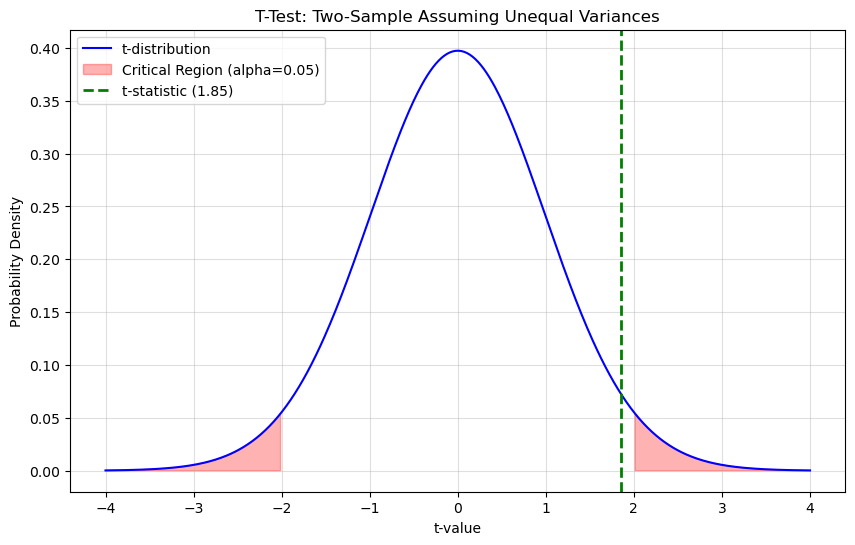

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Define degrees of freedom and x range for the t-distribution
df = min(len(male_spending) - 1, len(female_spending) - 1)
x = np.linspace(-4, 4, 500)
t_dist = t.pdf(x, df)

# Plot the t-distribution
plt.figure(figsize=(10, 6))
plt.plot(x, t_dist, label='t-distribution', color='blue')

# Mark the critical regions and the t-statistic
critical_t_pos = t.ppf(1 - 0.025, df)  # Positive critical value for 95% confidence
critical_t_neg = t.ppf(0.025, df)      # Negative critical value for 95% confidence

# Fill critical regions
plt.fill_between(x, 0, t_dist, where=(x >= critical_t_pos) | (x <= critical_t_neg), 
                 color='red', alpha=0.3, label='Critical Region (alpha=0.05)')

# Plot the t-statistic
plt.axvline(x=t_stat, color='green', linestyle='--', linewidth=2, label=f't-statistic ({t_stat:.2f})')

# Add labels, legend, and title
plt.title('T-Test: Two-Sample Assuming Unequal Variances')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(alpha=0.4)

# Show the plot
plt.show()

In [10]:
import pandas as pd

df = pd.read_csv('/Users/jinnanut/Library/Mobile Documents/com~apple~CloudDocs/NUT/Exeter University/Master/BEMM457 Topic in BA/Individual Project/Datacoding/DataQ21.csv')

# Create a summary dataframe grouping by Gender and Region of Visit, summing Total spending
data = df.groupby(['Gender', 'Region of Visit'], as_index=False)['Total spending'].sum()

print(data)

   Gender  Region of Visit  Total spending
0  Female           Europe        18986.41
1  Female    North America         4133.79
2  Female  Other Countries        36702.65
3  Female      Total World          762.89
4    Male           Europe        24145.02
5    Male    North America         4625.01
6    Male  Other Countries        41526.81
7    Male      Total World          888.79


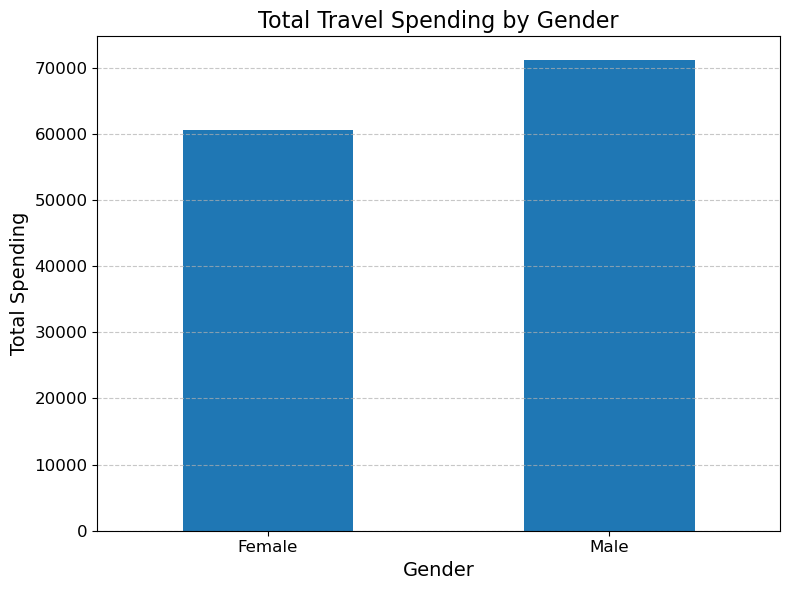

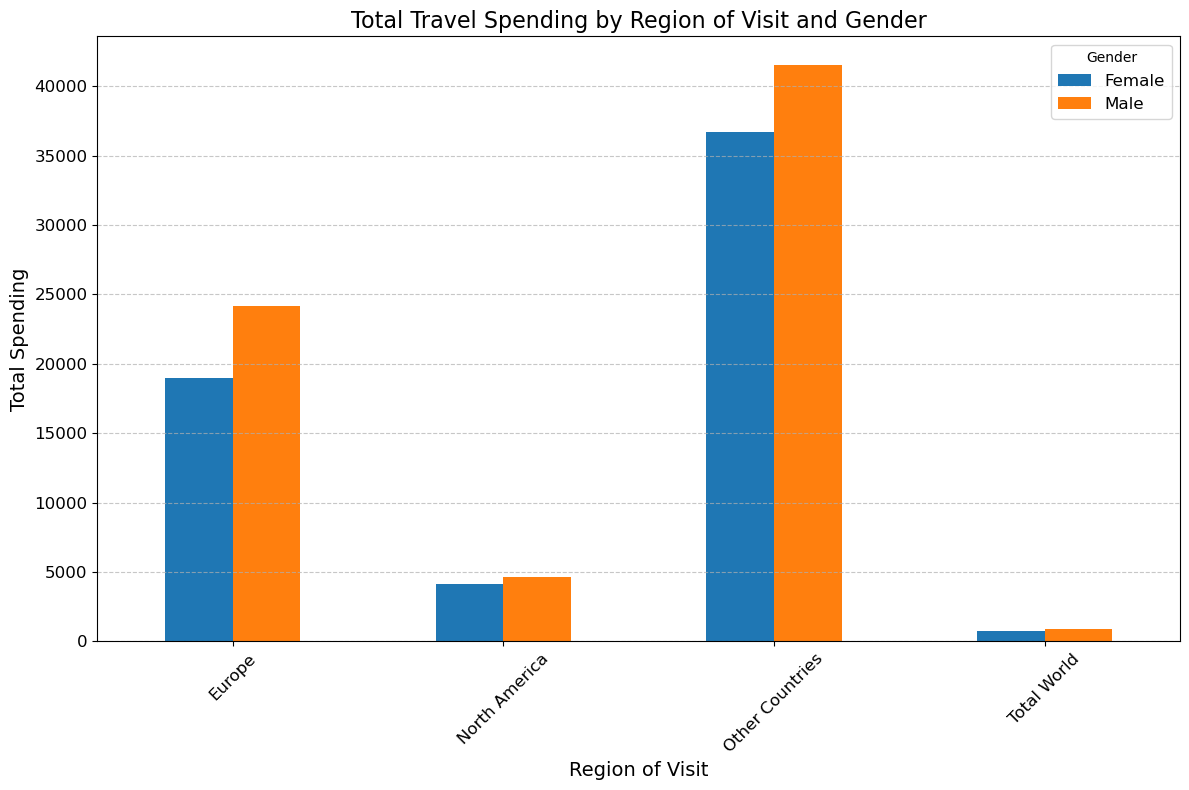

In [13]:
import matplotlib.pyplot as plt

# Aggregate total spending by Gender
gender_spending = data.groupby('Gender')['Total spending'].sum()

# Create a bar chart
plt.figure(figsize=(8, 6))
gender_spending.plot(kind='bar')

# Adding titles and labels
plt.title('Total Travel Spending by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Total Spending', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# Aggregate total spending by Region of Visit and Gender
region_total_spending = data.groupby(['Region of Visit', 'Gender'])['Total spending'].sum().unstack()

# Create a grouped bar chart
region_total_spending.plot(kind='bar', figsize=(12, 8))

# Adding titles and labels
plt.title('Total Travel Spending by Region of Visit and Gender', fontsize=16)
plt.xlabel('Region of Visit', fontsize=14)
plt.ylabel('Total Spending', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
